Where does the cleaning differ between the datasets?

    We approached the cleaning in very similar ways. We skipped the first row that contained the source link. We handled any cells that had empty values by either dropping or renaming strings to “Unknown.”

    Pratik’s Dataset
    The dataset looks very similar to Stanley’s dataset
    used a groupby on directors, which was another way to get counts
    tried to print specific mean values for IMDB ratings after groupby

    Stanley’s Dataset
    Dropped columns that didn’t have analytical values. Used a set to get the count of unique genres, different from Pratik’s
    Separated genre counts into individual (Drama, Thriller) would be separated into (Drama) and (Thriller)



    Afred’s Dataset
    The dataset has additional columns, like certificates and stars in the movie
    Dropped columns that didn’t have analytical values

    Individual Work Overview
    We all had to skip the first row of the data set that contained the source link
    We all did something similar with getting the director counts by using value_counts()




Discuss as a group (and denote in your final markdown) how you would handle data cleaning if you were given all 3 datasets to start?
    
    We would probably think of what should act as the key when we merge everything. In our case, we use the Title of the movie as the basis of merging everything
    We also have to consider which columns we keep and drop
    The steps we would take would be:
    Clean the individual datasets
    Merge them based on their Title matches
    Clean the merged datasets, remove/rename columns
    Ensure no empty values exist
    Are there any places in your cleaning where you could add functions for more efficient (and possibly automated) cleaning
    I think we could add a function in the initial setup of the cleaning process, where we skipped the first row that contains the source link
    Another function we can create is one that can remove null and duplicate values by passing in a dataframe


What's different about the movie sets?

    Stanley’s and Pratik’s datasets were very similar; they had the same column number, column names, and entries. Alfred’s dataset had additional columns like stars in the movie, gross earnings, certificates (age rating), meta rating, movie overview, and different values in the number of votes. We had to consider these differences when we combined our three datasets.


    Using these datasets, what types of questions/analytics about the data could be answered or addressed?


    Is there any data you wish these datasets had? (Are there any relevant attributes you think would provide further insight) 

    Having data on the cost to make the movie would be good. We can use this with the grosses to see the profit margins, which can provide more insight
    We found that there was data online for popularity, we think this could be helpful in

    If you answered yes to this, do a brief online search to see if you can find some data to combine with what we have (optional)

    We got more data on the costs to make the movie from https://www.kaggle.com/datasets/utkarshx27/movies-dataset?resource=download
    We also created a function that takes a title as a parameter and returns the stars and directors who worked on that film


    Reflections/Questions we had to ask ourselves
    When combining our three datasets, would it be best to combine the uncleaned original datasets or the three cleaned datasets?



SECTION 2

    Process of the Aggregated dataset/Conclusion
    Loaded 3 separated datasets
    Cleaned the individual datasets
    We merged using an inner join based on the Title
    1000 rows across 3 datasets become 557 matching entries in the aggregated dataset
    Cleaned for duplicate columns
    Removed and renamed columns


COMBINING DATA SETS:

In [1]:
import pandas as pd 

pd.set_option('display.max_columns', None) # Allows us to see all of the columns without any truncation

In [4]:
# Reading in the Different File for the DataFrames
par = pd.read_csv(r'..\Data\Movie Data\IMDB_Top1000_1996_2024_reddit.csv', header = 1)
stn = pd.read_csv(r'..\Data\Movie Data\imdb-top-rated-movies-user-rated-kaggle.csv', header = 1 )
alf = pd.read_csv(r'..\Data\Movie Data\imdb_top_1000.csv', header = 1)
cost = pd.read_csv(r'..\Data\Movie Data\movie_dataset.csv')

In [5]:
# Merged the DataFrames
superDF = pd.merge(par,stn)
# Renamed the Series in third DataFrame to merge on common Series Name
alf = alf.rename(columns={'Series_Title':'Title'})
superDF = pd.merge(superDF,alf, on = 'Title', how = 'inner')

In [6]:
# DATA CLEANING 
# Drop: Original Title, Runtime, IMDB_Rating, Released_Year, Genre, Director
# Rename: No_of_votes -> IMDB Votes, Num Votes -> Total Votes, Poster_Link -> Review Link

superDF = superDF.rename(columns = {'No_of_Votes': 'IMDB Votes', 'Num Votes': 'Total Votes', 'Poster_Link': 'Review Link'})
superDF.drop({'Original Title', 'Runtime', 'IMDB_Rating', 'Released_Year', 'Genre', 'Director'}, axis = 1, inplace = True)

In [7]:
# Creating a more user friendly presentation of the Series in the DataFrame
new_order = [
    'Position',
    'Title',
    'Title Type',
    'Certificate',
    'Year',
    'Release Date',
    'Directors',
    'Star1',
    'Star2',
    'Star3',
    'Star4',
    'Genres',
    'Runtime (mins)',
    'Overview',
    'IMDb Rating',
    'Meta_score',
    'Total Votes',
    'IMDB Votes',
    'Gross',
    'URL',
    'Review Link'
]

superDF = superDF[new_order]

In [8]:
superDF["Release Date"] = pd.to_datetime(superDF["Release Date"],errors="coerce")
superDF = superDF.dropna(subset=["Release Date"])

In [9]:
cost = cost[['original_title','budget','original_language', 'popularity']]
cost = cost.rename(columns = {'original_title':'Title','original_language': 'language'})

In [10]:
# Function for finding the Stars with Directors
def directorWithStars(title):

    stars = superDF[superDF['Title'] == title].loc[:,['Star1','Star2','Star3','Star4']]
    director = superDF[superDF['Title'] == title].loc[:, 'Directors']
    
    return list(stars.iloc[0]), director.iloc[0]
    
a = directorWithStars('12 Angry Men')
print(f"Stars: {a[0]}")
print(f"Directors: {a[1]}")

Stars: ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'John Fiedler']
Directors: Sidney Lumet


In [12]:
import matplotlib.pyplot as plt

In [13]:
superDF.head(2)

,Position,Title,Title Type,Certificate,Year,Release Date,Directors,Star1,Star2,Star3,Star4,Genres,Runtime (mins),Overview,IMDb Rating,Meta_score,Total Votes,IMDB Votes,Gross,URL,Review Link
0,1,The Shawshank Redemption,Movie,A,1994,1994-10-14,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Drama,142,Two imprisoned men bond over a number of years...,9.3,80.0,3127837,2343110,"28,341,469",https://www.imdb.com/title/tt0111161/,https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,The Godfather,Movie,A,1972,1972-03-24,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"Crime, Drama",175,An organized crime dynasty's aging patriarch t...,9.2,100.0,2182281,1620367,"134,966,411",https://www.imdb.com/title/tt0068646/,https://m.media-amazon.com/images/M/MV5BM2MyNj...


In [14]:

sortD = superDF.groupby('Directors')['IMDb Rating'].count()

sortD = sortD.sort_values(ascending = False)
directors = sortD.head(10)

directors

Directors
Alfred Hitchcock     13
Steven Spielberg     10
David Fincher         8
Martin Scorsese       8
Stanley Kubrick       8
Christopher Nolan     8
Clint Eastwood        7
Quentin Tarantino     7
Peter Jackson         6
Charles Chaplin       6
Name: IMDb Rating, dtype: int64

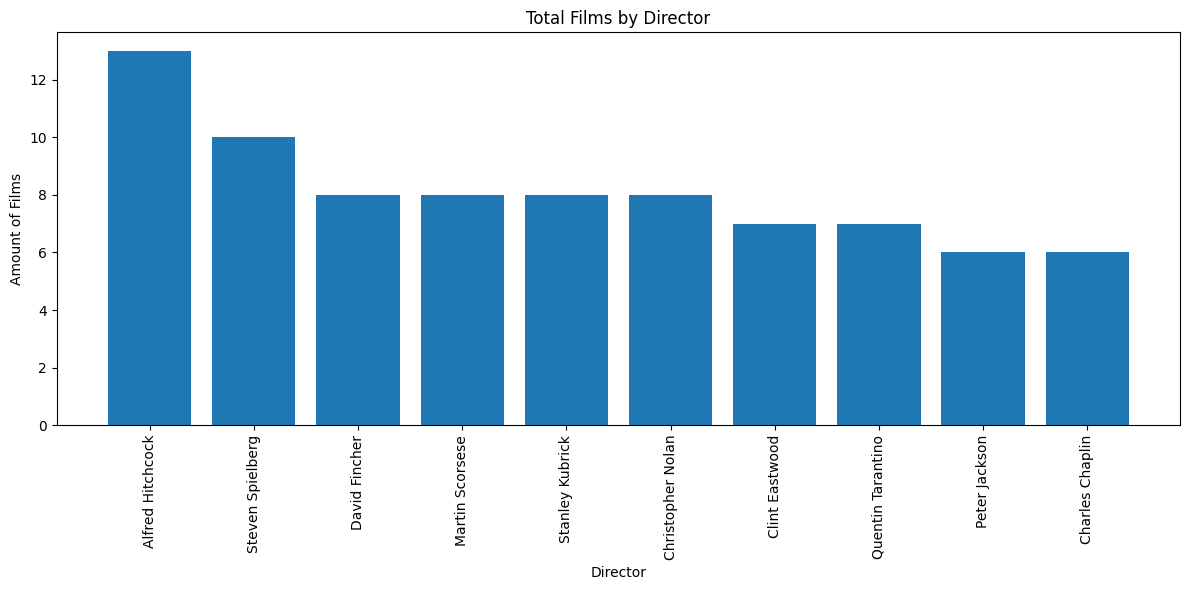

In [15]:
plt.figure(figsize=(12,6))
plt.bar(directors.index, directors.values)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Amount of Films')
plt.title('Total Films by Director')
plt.tight_layout()
plt.show()